##Winda Apriliyanti

# **1. Perkenalan Dataset**


This dataset contains images of hand gestures from the Rock-Paper-Scissors game.

# **2. Import Library**

Input library yang dibutuhkan dalam load dataset seperti gambar dalam folder, data gambar dll.

In [ ]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import library
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy as sp
import itertools
import splitfolders
import zipfile,os
import cv2

In [ ]:
# import deep learning library
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Activation, Flatten, MaxPool2D
from tensorflow.keras.optimizers import Adam, RMSprop

print(tf.__version__)

2.17.0


# **3. Memuat Dataset**

In [9]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("drgfreeman/rockpaperscissors")

print("Path to dataset files:", path)

100%|██████████| 306M/306M [00:03<00:00, 91.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/drgfreeman/rockpaperscissors/versions/2


# **4. Pisahkan Data**

In [38]:
import os

# Mengatur path ke dataset yang diunduh
data_dir = '/root/.cache/kagglehub/datasets/drgfreeman/rockpaperscissors/versions/2'

# Membagi dataset menjadi training dan validation set dengan perbandingan 70:30
splitfolders.ratio(
    os.path.join(data_dir, 'rps-cv-images'),
    output=data_dir,
    seed=1337,
    ratio=(.7, .3)
)

# Membagi dataset dengan ukuran tetap, 100 gambar untuk training dan 100 untuk validation
splitfolders.fixed(
    os.path.join(data_dir, 'rps-cv-images'),
    output=data_dir,
    seed=1337,
    fixed=(100, 100),
    oversample=False
)

# Mengatur direktori untuk training dan validation
training_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'val')

# Memeriksa jumlah file di setiap folder
print("Jumlah gambar paper:", len(os.listdir(os.path.join(data_dir, 'rps-cv-images/paper'))))
print("Jumlah gambar rock:", len(os.listdir(os.path.join(data_dir, 'rps-cv-images/rock'))))
print("Jumlah gambar scissors:", len(os.listdir(os.path.join(data_dir, 'rps-cv-images/scissors'))))

# Menampilkan isi dari direktori train dan val
print("Isi direktori train:", os.listdir(training_dir))
print("Isi direktori val:", os.listdir(validation_dir))

Copying files: 2188 files [00:00, 2546.84 files/s]
Copying files: 2188 files [00:01, 1924.35 files/s]

Jumlah gambar paper: 712
Jumlah gambar rock: 726
Jumlah gambar scissors: 750
Isi direktori train: ['rock', 'scissors', 'paper']
Isi direktori val: ['rock', 'scissors', 'paper']


In [39]:
paper_imgs = os.listdir(training_paper_dir)
rock_imgs = os.listdir(training_rock_dir)
scissors_imgs = os.listdir(training_scissors_dir)

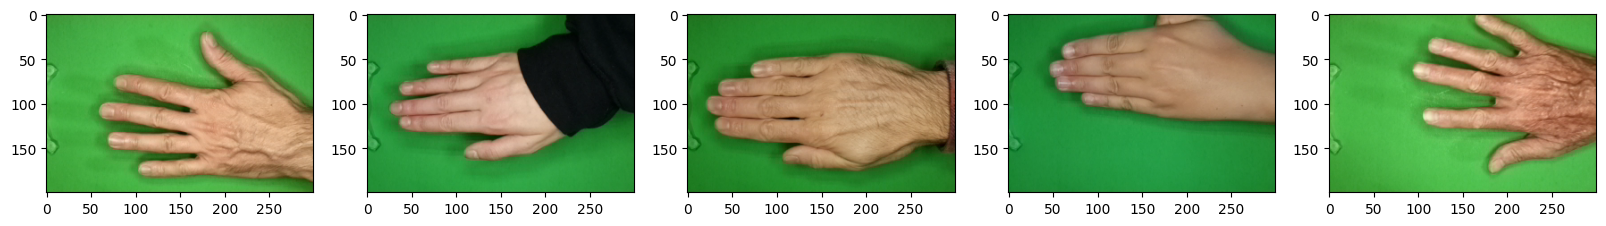

In [40]:
plt.figure(figsize=(20, 4))
for i, img_path in enumerate(paper_imgs[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(training_paper_dir, img_path))
    plt.imshow(img)
plt.show()

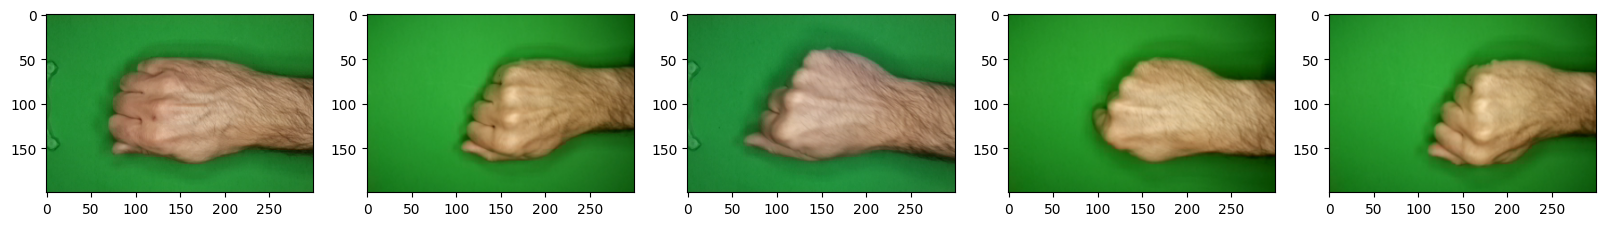

In [16]:
plt.figure(figsize=(20, 4))
for i, img_path in enumerate(rock_imgs[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(training_rock_dir, img_path))
    plt.imshow(img)
plt.show()

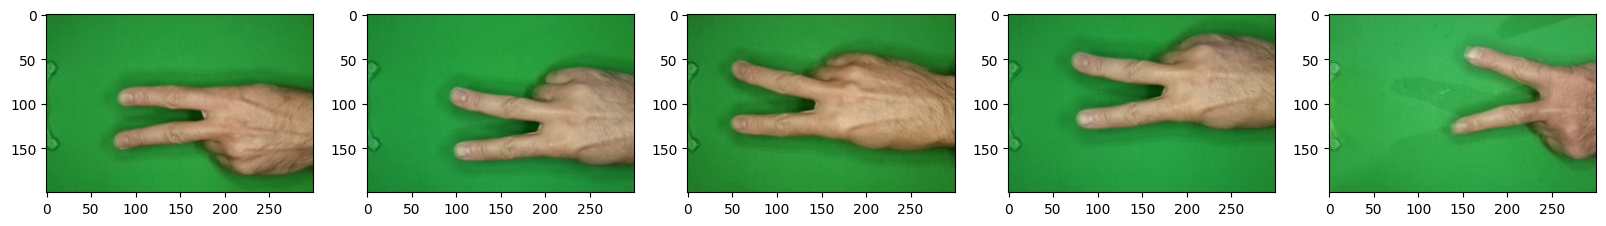

In [17]:
plt.figure(figsize=(20, 4))
for i, img_path in enumerate(scissors_imgs[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(training_scissors_dir, img_path))
    plt.imshow(img)
plt.show()

# **5. Augmentasi Data Gambar**

In [41]:
# Augmentation Image with [ImageDataGenerator] for train datagen
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   horizontal_flip=True,
                                   shear_range=0.2,
                                   fill_mode='nearest')

# Augmentation Image with [ImageDataGenerator] for validation datagen
val_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   horizontal_flip=True,
                                   shear_range=0.2,
                                   fill_mode='nearest')


In [42]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(val_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='categorical')

Found 1588 images belonging to 3 classes.
Found 657 images belonging to 3 classes.


# **6. Membangun Arsitektur CNN**

In [43]:
layers = tf.keras.layers

model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation= 'relu', input_shape = (150,150,3)),
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation= 'relu'),
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation= 'relu'),
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(512,activation= 'relu'),
      tf.keras.layers.Dense(3, activation= 'softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,035,203 (72.61 MB)

 Trainable params: 19,035,203 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

# **7. Kompilasi Model**

In [44]:
model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(), metrics=['accuracy'])


In [48]:
callbacks = tf.keras.callbacks.ModelCheckpoint(filepath='model.keras', verbose=1, save_best_only=True)

history = model.fit (
    train_generator,
    steps_per_epoch = 41,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 27,
    verbose = 2,
    callbacks = [callbacks]
)

Epoch 1/20

Epoch 1: val_loss improved from inf to 0.85801, saving model to model.keras
41/41 - 129s - 3s/step - accuracy: 0.4800 - loss: 1.0636 - val_accuracy: 0.6377 - val_loss: 0.8580
Epoch 2/20

Epoch 2: val_loss improved from 0.85801 to 0.70669, saving model to model.keras
41/41 - 40s - 978ms/step - accuracy: 0.7049 - loss: 0.7869 - val_accuracy: 0.7291 - val_loss: 0.7067
Epoch 3/20

Epoch 3: val_loss improved from 0.70669 to 0.31530, saving model to model.keras
41/41 - 144s - 4s/step - accuracy: 0.8192 - loss: 0.4819 - val_accuracy: 0.8950 - val_loss: 0.3153
Epoch 4/20

Epoch 4: val_loss did not improve from 0.31530
41/41 - 31s - 747ms/step - accuracy: 0.9306 - loss: 0.2377 - val_accuracy: 0.8737 - val_loss: 0.3257
Epoch 5/20

Epoch 5: val_loss improved from 0.31530 to 0.22266, saving model to model.keras
41/41 - 109s - 3s/step - accuracy: 0.9123 - loss: 0.2432 - val_accuracy: 0.9330 - val_loss: 0.2227
Epoch 6/20

Epoch 6: val_loss did not improve from 0.22266
41/41 - 31s - 754ms

# **8. Plot Kurva Data Train dan Validasi**



Grafik untuk Train Accuracy dan Validation Accuracy

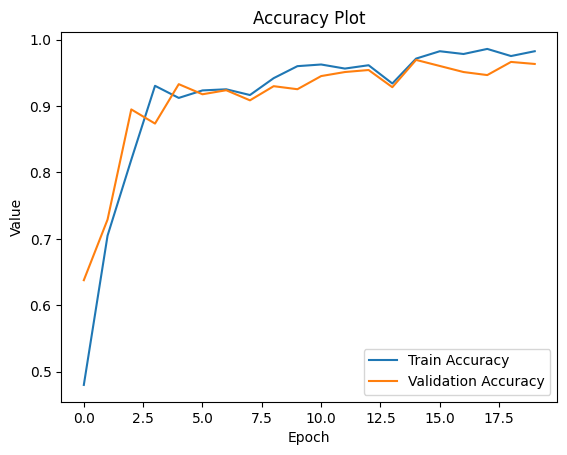

In [49]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

Grafik untuk Training loss dan Validation loss

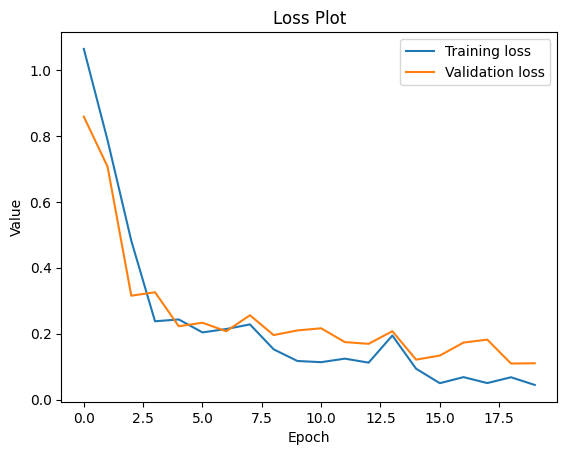

In [50]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'], label ='Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


# **9. Model Predict**


Saving 0Ug54ifXRqqlZS2Z.png to 0Ug54ifXRqqlZS2Z (1).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
0Ug54ifXRqqlZS2Z (1).png
gunting


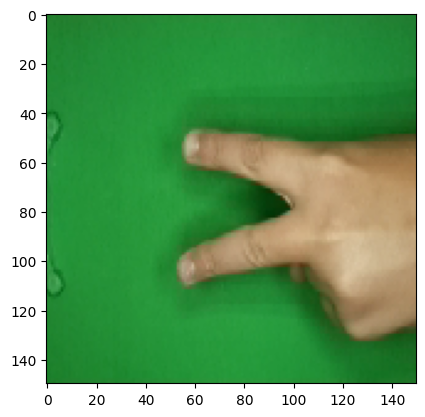

In [52]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for file_myimage in uploaded.keys():

  path = file_myimage
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images= np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(file_myimage)
  if classes[0,0] !=0:
    print('kertas')
  elif classes[0,1] !=0:
    print('batu')
  else:
    print('gunting')